1. ĐỌC FILE DỮ LIỆU CSV

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
from scipy.stats import norm
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

df = pd.read_csv('data/filtered_data_northern_vietnam.csv')
df

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON
0,2013-01-01,VMM00048840,61,54,59,0.00,2013,1,Winter
1,2013-01-04,VMM00048840,59,54,56,0.00,2013,1,Winter
2,2013-01-05,VMM00048840,56,52,54,0.01,2013,1,Winter
3,2013-01-06,VMM00048840,54,52,53,0.05,2013,1,Winter
4,2013-01-07,VMM00048840,57,53,55,0.00,2013,1,Winter
...,...,...,...,...,...,...,...,...,...
7613,2024-09-11,VMM00048806,81,70,73,0.00,2024,9,Autumn
7614,2024-09-12,VMM00048806,82,69,75,0.00,2024,9,Autumn
7615,2024-09-14,VMM00048806,84,70,76,0.00,2024,9,Autumn
7616,2024-09-15,VMM00048806,89,69,79,0.00,2024,9,Autumn


2. CHUYỂN ĐỘ F THÀNH ĐỘ C

In [226]:
df['TMAX'] = round((df['TMAX']-32)/1.8, 1)
df['TMIN'] = round((df['TMIN']-32)/1.8, 1)
df['TAVG'] = round((df['TAVG']-32)/1.8, 1)
df

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON
0,2013-01-01,VMM00048840,16.1,12.2,15.0,0.00,2013,1,Winter
1,2013-01-04,VMM00048840,15.0,12.2,13.3,0.00,2013,1,Winter
2,2013-01-05,VMM00048840,13.3,11.1,12.2,0.01,2013,1,Winter
3,2013-01-06,VMM00048840,12.2,11.1,11.7,0.05,2013,1,Winter
4,2013-01-07,VMM00048840,13.9,11.7,12.8,0.00,2013,1,Winter
...,...,...,...,...,...,...,...,...,...
7613,2024-09-11,VMM00048806,27.2,21.1,22.8,0.00,2024,9,Autumn
7614,2024-09-12,VMM00048806,27.8,20.6,23.9,0.00,2024,9,Autumn
7615,2024-09-14,VMM00048806,28.9,21.1,24.4,0.00,2024,9,Autumn
7616,2024-09-15,VMM00048806,31.7,20.6,26.1,0.00,2024,9,Autumn


3. KIỂM TRA XEM CÓ DỮ LIỆU NÀO BỊ LỖI KHÔNG 

In [227]:
a = df[(df['TMIN'] > df['TAVG']) & (df['TAVG'] > df['TMAX'])]
a


,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON


In [228]:
df['STATION'].unique() # xem có những khu vực quan sát nào

array(['VMM00048840', 'VMM00048825', 'VMM00048826', 'VMM00048830',
       'VMM00048808', 'VMM00048806'], dtype=object)

In [229]:
# kiểm tra xem có bản ghi nào trùng lặp ko
df[df.duplicated()]

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON


4. KIỂM TRA PHẠM VI CỦA TAVG,TMAX,TMIN

<Axes: title={'center': 'TAVG'}, xlabel='[STATION]', ylabel='TAVG'>

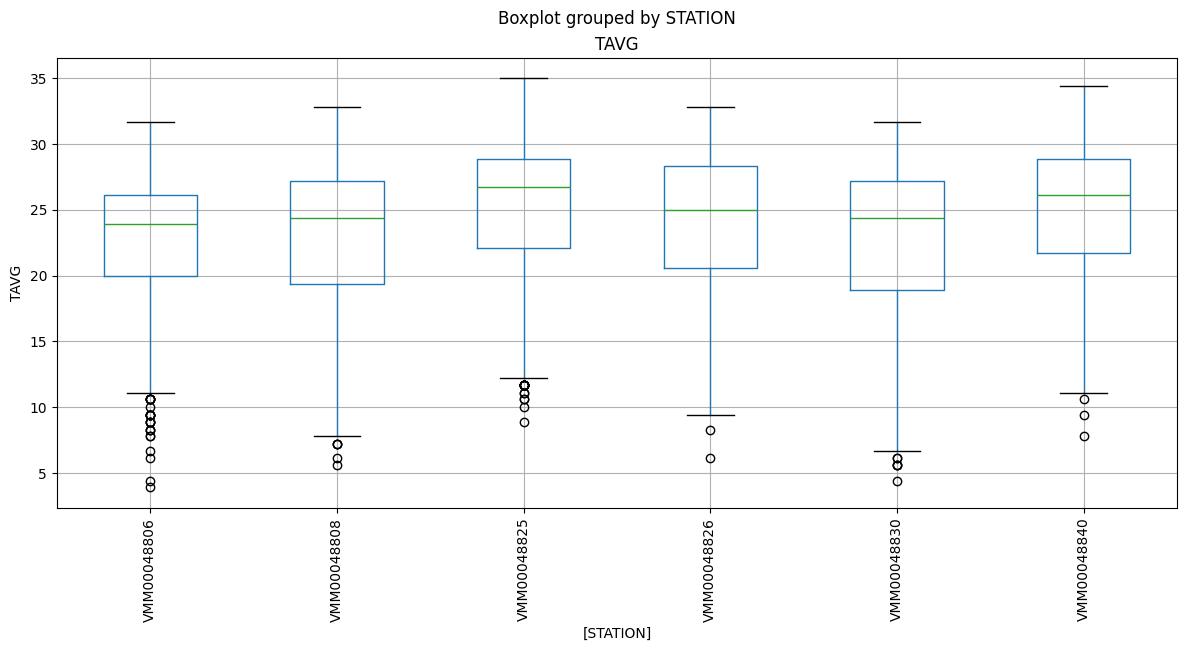

In [230]:
# kiểm tra phạm vi của Tavg
ax = df[['TAVG', 'STATION']].boxplot(by='STATION', figsize=(14, 6))
ax.set_ylabel('TAVG')
plt.xticks(rotation=90)
ax


5. GÁN MÁC CÁC GIÁ TRỊ NGOÀI PHẠM VI

In [231]:
# Tính toán Q1, Q3 và IQR cho từng tỉnh
def calculate_isoutlier(df, column):
    df['ISOUTLIER'] = False  # Khởi tạo cột IsOutlier mặc định là False
    for (station), group in df.groupby('STATION'):
        q1 = group[column].quantile(0.25)
        q3 = group[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = (group[column] < lower_bound) | (group[column] > upper_bound)
        # Lọc các giá trị outlier
        df.loc[(df['STATION'] == station) & outliers, 'ISOUTLIER'] = True
    return df

# Lấy các giá trị outlier cho từng tỉnh
df = calculate_isoutlier(df,'TAVG')
df



,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON,ISOUTLIER
0,2013-01-01,VMM00048840,16.1,12.2,15.0,0.00,2013,1,Winter,False
1,2013-01-04,VMM00048840,15.0,12.2,13.3,0.00,2013,1,Winter,False
2,2013-01-05,VMM00048840,13.3,11.1,12.2,0.01,2013,1,Winter,False
3,2013-01-06,VMM00048840,12.2,11.1,11.7,0.05,2013,1,Winter,False
4,2013-01-07,VMM00048840,13.9,11.7,12.8,0.00,2013,1,Winter,False
...,...,...,...,...,...,...,...,...,...,...
7613,2024-09-11,VMM00048806,27.2,21.1,22.8,0.00,2024,9,Autumn,False
7614,2024-09-12,VMM00048806,27.8,20.6,23.9,0.00,2024,9,Autumn,False
7615,2024-09-14,VMM00048806,28.9,21.1,24.4,0.00,2024,9,Autumn,False
7616,2024-09-15,VMM00048806,31.7,20.6,26.1,0.00,2024,9,Autumn,False


In [232]:
# kiểm tra outlier
df[df['ISOUTLIER']==True]

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON,ISOUTLIER
269,2014-02-11,VMM00048840,11.1,9.4,10.6,0.04,2014,2,Spring,True
487,2016-01-25,VMM00048840,11.1,6.1,9.4,0.01,2016,1,Winter,True
488,2016-01-26,VMM00048840,8.3,7.2,7.8,1.26,2016,1,Winter,True
1237,2013-01-06,VMM00048825,12.8,8.9,11.7,0.07,2013,1,Winter,True
1238,2013-01-07,VMM00048825,12.2,10.0,11.7,0.02,2013,1,Winter,True
...,...,...,...,...,...,...,...,...,...,...
7284,2022-02-21,VMM00048806,10.0,6.1,7.8,0.00,2022,2,Spring,True
7285,2022-02-23,VMM00048806,12.8,6.1,9.4,0.09,2022,2,Spring,True
7511,2024-01-23,VMM00048806,10.0,7.2,8.3,0.05,2024,1,Winter,True
7512,2024-01-24,VMM00048806,10.6,7.2,8.3,0.00,2024,1,Winter,True


6. NHIỆT ĐỘ TRUNG BÌNH THEO NĂM TRONG PHẠM VI

In [233]:
# temp_avg theo năm
df1 = df[df['ISOUTLIER']==False].groupby('YEAR')['TAVG'].mean().reset_index().round(1)
df1.to_csv('temp_year.csv',index= False)

7. NHIỆT ĐỘ THAY ĐỔI QUA TỪNG NĂM

In [234]:
df1 = pd.read_csv('temp_year.csv')
# tính sự thay đổi nhiệt giữa các năm
df1['TEMP_CHANGE'] = df1['TAVG'].diff().round(1)
# dùng loc để gán giá trị đầu là nan
df1.loc[0,'TEMP_CHANGE'] = np.nan
df1


,YEAR,TAVG,TEMP_CHANGE
0,2013,23.4,NaN
1,2014,23.6,0.2
2,2015,19.3,-4.3
3,2016,26.0,6.7
4,2017,23.4,-2.6
5,2018,23.9,0.5
6,2019,25.6,1.7
7,2020,22.0,-3.6
8,2021,22.7,0.7
9,2022,24.2,1.5


8. NHIỆT ĐỘ MAX, MIN VÀ BIÊN ĐỘ NHIỆT THEO NĂM

In [235]:
# Tính nhiệt độ lớn nhất và nhỏ nhất theo từng năm
temp_max = df.groupby('YEAR')['TMAX'].max().reset_index(name= 'TMAX')
temp_min = df.groupby('YEAR')['TMIN'].min().reset_index(name= 'TMIN')
# Tính biên độ dao động nhiệt theo năm
df1 = df1.merge(temp_max, on='YEAR', how='left')
df1 = df1.merge(temp_min, on='YEAR', how='left')
df1

,YEAR,TAVG,TEMP_CHANGE,TMAX,TMIN
0,2013,23.4,NaN,39.4,1.1
1,2014,23.6,0.2,39.4,0.6
2,2015,19.3,-4.3,40.0,3.3
3,2016,26.0,6.7,38.9,2.8
4,2017,23.4,-2.6,38.3,10.0
5,2018,23.9,0.5,40.0,1.1
6,2019,25.6,1.7,41.1,0.0
7,2020,22.0,-3.6,38.9,8.3
8,2021,22.7,0.7,40.0,3.3
9,2022,24.2,1.5,44.4,4.4


9. XÁC ĐỊNH TUẦN SUẤT NHIỆT CỰC ĐOAN

In [236]:
hot_ = df[df['TMAX']>37].groupby('YEAR')['TMAX'].count().reset_index(name='frequency_hot')
cold_ = df[df['TMIN']<5].groupby('YEAR')['TMIN'].count().reset_index(name='frequency_cold')
df1 = df1.merge(hot_,on='YEAR',how='left')
df1 = df1.merge(cold_,on='YEAR',how='left')
# Thay thế các giá trị NaN trong cột 'frequency_cold' bằng 0
df1['frequency_cold'] = df1['frequency_cold'].fillna(0).astype(int)
df1.to_csv('temp_year.csv',index=False)


10. VẼ ĐỒ THỊ

Text(0.5, 1.0, 'nhiệt độ trung bình theo năm')

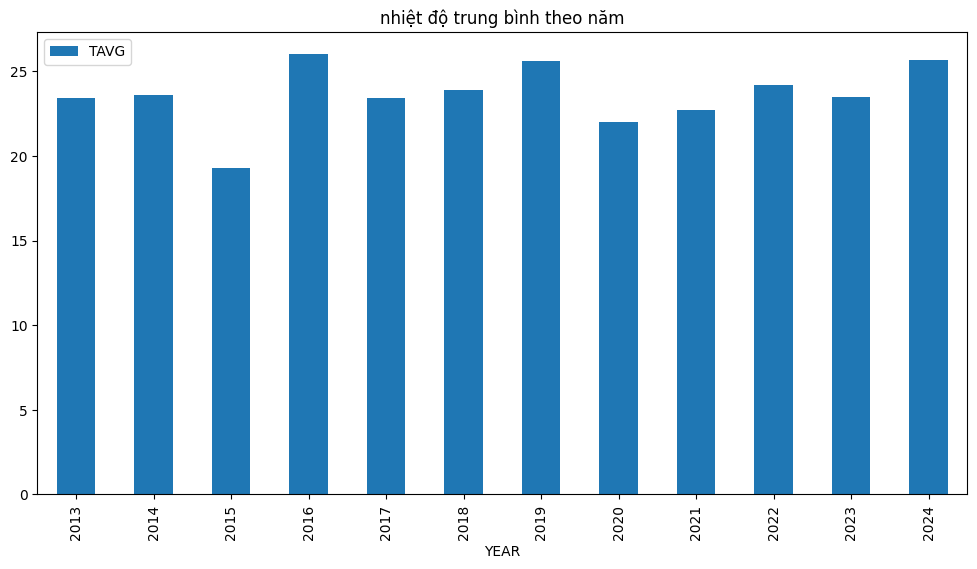

In [237]:
df1.plot(kind= 'bar',x='YEAR',y='TAVG',figsize=(12,6))
plt.title('nhiệt độ trung bình theo năm')

<Axes: xlabel='YEAR'>

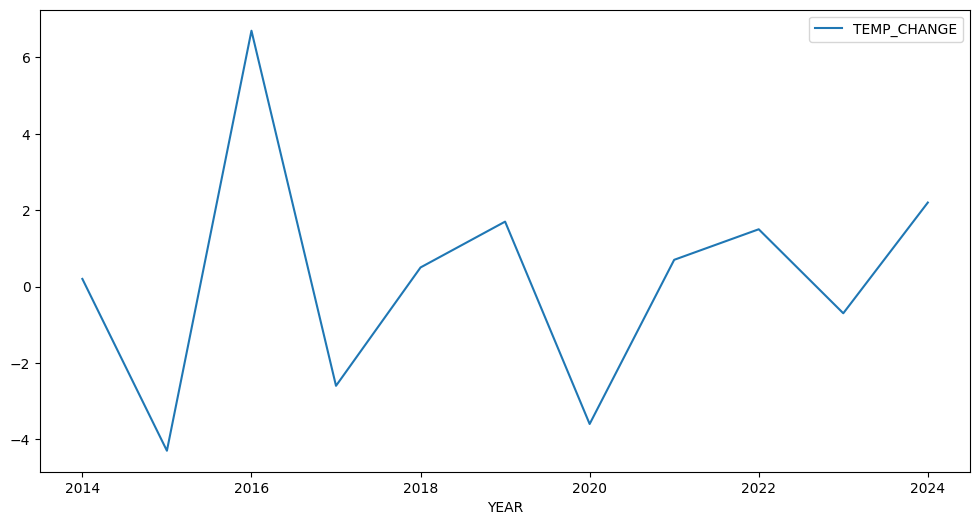

In [238]:
df1.plot(kind='line',x = 'YEAR',y ='TEMP_CHANGE',figsize=(12,6))

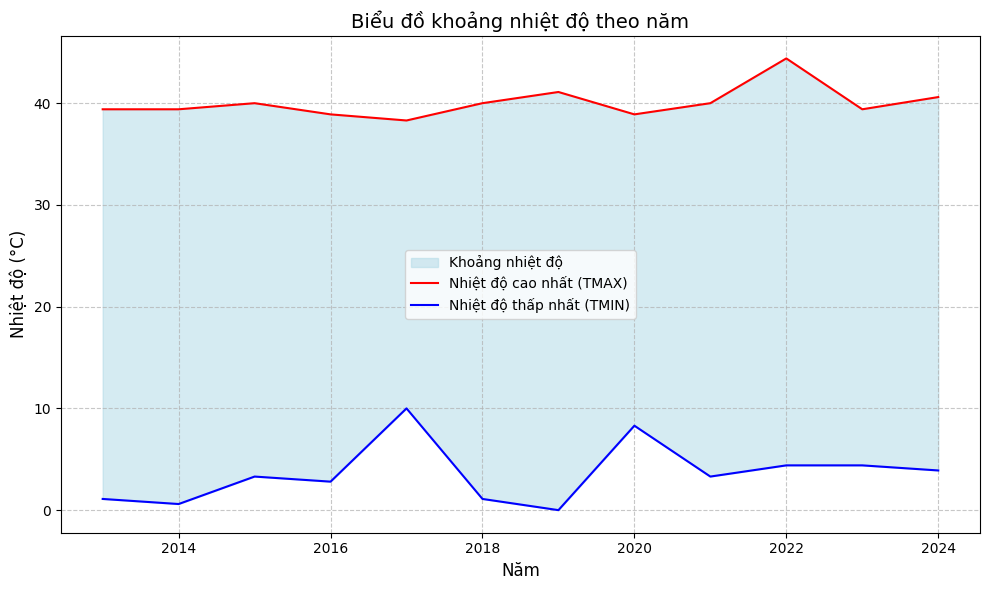

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
# Vẽ biểu đồ vùng
plt.figure(figsize=(10, 6))
plt.fill_between(df1['YEAR'], df1['TMAX'], df1['TMIN'], color='lightblue', alpha=0.5, label='Khoảng nhiệt độ')
plt.plot(df1['YEAR'], df1['TMAX'], color='red', label='Nhiệt độ cao nhất (TMAX)')
plt.plot(df1['YEAR'], df1['TMIN'], color='blue', label='Nhiệt độ thấp nhất (TMIN)')

# Cấu hình biểu đồ
plt.title('Biểu đồ khoảng nhiệt độ theo năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [240]:
fig = px.bar(
    df1,
    x='YEAR',
    y=['frequency_hot', 'frequency_cold'],
    barmode='group',  # Grouped bar chart
    labels={'value': 'Tần số xuất hiện', 'YEAR': 'Năm'},
    title='So sánh tần số nhiệt độ cực đoan theo năm (Hot và Cold)',
    color_discrete_sequence=['salmon', 'skyblue']
)
fig.show()


In [241]:
fig = px.line(
    df1,
    x='YEAR',
    y=['frequency_hot', 'frequency_cold'],
    labels={'value': 'Tần số xuất hiện', 'YEAR': 'Năm'},
    title='Xu hướng tần số nhiệt độ cực đoan theo năm',
    markers=True,
    color_discrete_sequence=['salmon', 'skyblue']
)
fig.show()


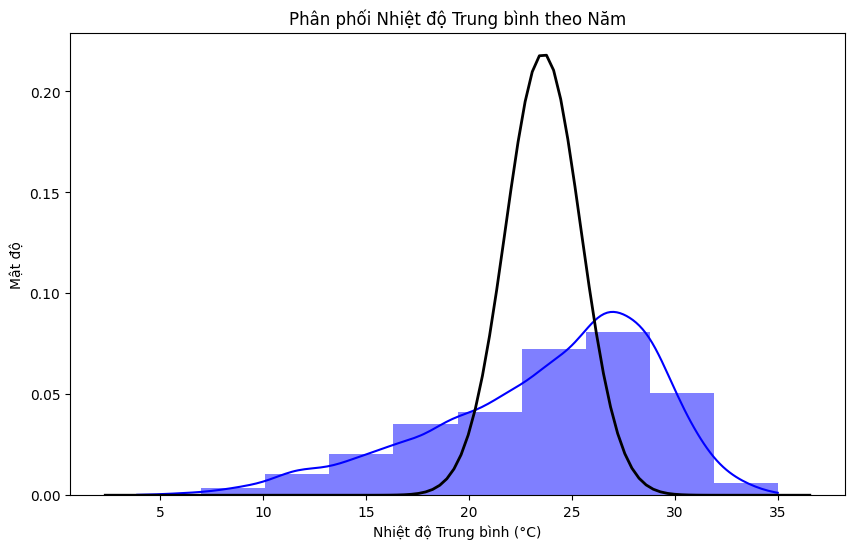

In [242]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TAVG'], kde=True, color='blue', bins=10, stat='density', linewidth=0)

# Tính toán các tham số cho phân phối chuẩn (mean và std dev)
mean = df1['TAVG'].mean()
std_dev = df1['TAVG'].std()

# Vẽ đường phân phối chuẩn
xmin, xmax = plt.xlim()  # Lấy phạm vi của trục x
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

# Thêm tiêu đề và nhãn
plt.title('Phân phối Nhiệt độ Trung bình theo Năm')
plt.xlabel('Nhiệt độ Trung bình (°C)')
plt.ylabel('Mật độ')

# Hiển thị đồ thị
plt.show()

In [243]:
df_orr = df.groupby(['MONTH','YEAR'])['TAVG'].mean().reset_index()
df_orr1 = df.groupby(['MONTH','YEAR'])['TMIN'].min().reset_index()
df_orr2 = df.groupby(['MONTH','YEAR'])['TMAX'].max().reset_index()
df_orr3 = df.groupby(['MONTH','YEAR'])['PRCP'].sum().reset_index()
df_orr = df_orr.merge(df_orr1,on=['YEAR','MONTH'],how='left')
df_orr = df_orr.merge(df_orr2,on=['YEAR','MONTH'],how='left')
df_orr = df_orr.merge(df_orr3,on=['YEAR','MONTH'],how='left')
df_orr = df_orr[df_orr['YEAR'].isin([2021,2022,2023,2024])]
df_orr.columns = df_orr.columns.str.lower()
df_orr.to_csv('correlate.csv',index=False)

11. DỰ BÁO NHIỆT ĐỘ

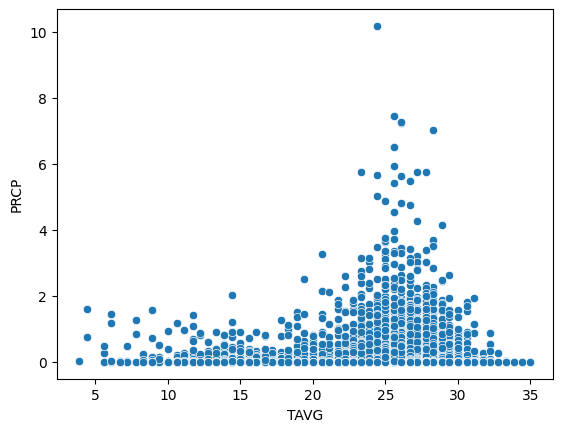

In [244]:
sns.scatterplot(
    data=df,
    x = 'TAVG',
    y = 'PRCP'
)
plt.show()

In [245]:
# đặt 2 vector là x và y
x = df['TAVG'].values
y = df['PRCP'].values
# tìm m và b trong phương trình y = m*x+b
N = x.shape[0] # lấy số lượng hàng của x
m = (N*np.sum(x*y)-np.sum(x)*np.sum(y))/(N*np.sum(x**2)-(np.sum(x)**2))
b = (np.sum(y)-m*np.sum(x))/N
print(m,b)


0.008608439003986862 -0.04380258142801393


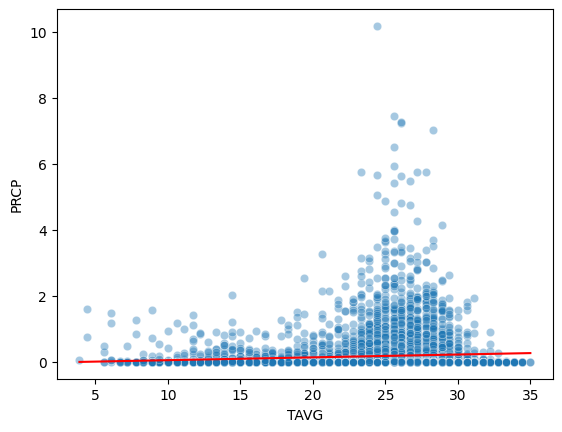

In [246]:
# vẽ
x_min = np.min(x)
y_min = m*x_min+b
x_max = np.max(x)
y_max = m*x_max+b
fig,ax = plt.subplots()
sns.scatterplot(
    data= df,
    x = 'TAVG',
    y = 'PRCP',
    ax=ax,
    alpha = 0.4
)
sns.lineplot(
    x = [x_min,x_max],
    y = [y_min,y_max],
    linewidth = 1.5,
    color = 'red'
)
plt.show()

,TAVG,TMAX,TMIN,PRCP
DATE,,,,
2013-01-01,12.683333,14.800000,10.266667,0.000000
2013-01-02,14.100000,17.000000,9.680000,0.000000
2013-01-04,12.600000,14.633333,11.666667,0.006667
2013-01-05,9.175000,10.700000,8.200000,0.012500
2013-01-06,10.466667,11.766667,8.900000,0.030000
...,...,...,...,...
2024-09-14,28.050000,32.766667,24.183333,0.020000
2024-09-15,28.175000,33.200000,24.175000,0.050000
2024-09-30,25.600000,31.100000,23.900000,0.310000


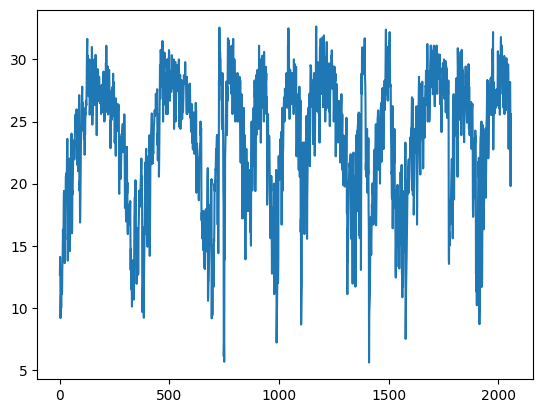

In [247]:
df = df.groupby(['DATE'])[['TAVG','TMAX','TMIN','PRCP']].mean().reset_index()
df['TAVG'].plot()
df.set_index(df['DATE'],inplace=True)
df = df.drop('DATE',axis=1)
df

In [248]:
df["target"] = df.shift(-1)["TAVG"]
df = df.ffill()
rr = Ridge(alpha=.1)
predictors = df.columns[~df.columns.isin(['YEAR','MONTH','target'])]
def backtest(weather, model, predictors, start=1, step=1):
    all_predictions = []
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)
predictions = backtest(df, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
2013-01-02,12.600000,14.100000,1.500000
2013-01-04,9.175000,14.344764,5.169764
2013-01-05,10.466667,26.728620,16.261953
2013-01-06,11.033333,11.800376,0.767042
2013-01-07,10.000000,11.046485,1.046485
...,...,...,...
2024-09-14,28.175000,27.364797,0.810203
2024-09-15,25.600000,27.436379,1.836379
2024-09-30,19.800000,25.536843,5.736843


In [249]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.6519026244714707

In [250]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2013-01-05,10.466667,26.728620,16.261953
2022-02-18,7.500000,22.757901,15.257901
2022-09-22,13.900000,27.425153,13.525153
2018-01-26,7.200000,20.179500,12.979500
2024-01-20,8.850000,21.560728,12.710728
...,...,...,...
2017-06-06,28.300000,28.291415,0.008585
2022-07-26,29.460000,29.463177,0.003177
2014-10-02,27.416667,27.414971,0.001696


In [251]:
pd.Series(rr.coef_, index=predictors)

TAVG    0.890177
TMAX   -0.126881
TMIN    0.129167
PRCP    0.530875
dtype: float64

In [252]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["TMAX", "TMIN", "PRCP",'TAVG']:
        df = compute_rolling(df, horizon, col)

In [253]:
def expand_mean(df):
    return df.expanding(1).mean()
df.index = pd.to_datetime(df.index)
for col in ["TMAX", "TMIN", "PRCP",'TAVG']:
    df[f"month_avg_{col}"] = df[col].groupby(df.index.month, group_keys=False).apply(expand_mean)
    df[f"day_avg_{col}"] = df[col].groupby(df.index.day_of_year, group_keys=False).apply(expand_mean)

In [254]:
df = df.iloc[14:,:]
df = df.fillna(0)
df

,TAVG,TMAX,TMIN,PRCP,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,...,rolling_14_TAVG,rolling_14_TAVG_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP,month_avg_TAVG,day_avg_TAVG
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-16,16.300000,18.516667,14.050000,0.013333,15.000000,16.977778,0.090641,12.455556,0.128011,0.009444,...,12.196786,0.336418,14.358000,18.516667,10.241556,14.050000,0.009500,0.013333,12.229222,16.300000
2013-01-18,15.000000,16.500000,14.066667,0.013333,15.025000,16.983333,-0.028459,13.755556,0.022617,0.013889,...,12.261071,0.223384,14.491875,16.500000,10.480625,14.066667,0.009740,0.013333,12.402396,15.000000
2013-01-19,15.025000,16.800000,12.775000,0.000000,17.616667,17.272222,-0.027340,13.630556,-0.062767,0.008889,...,12.434286,0.208352,14.627647,16.800000,10.615588,12.775000,0.009167,0.000000,12.556667,15.025000
2013-01-20,17.616667,21.666667,13.516667,0.000000,19.166667,18.322222,0.182535,13.452778,0.004749,0.004444,...,13.037262,0.351255,15.018704,21.666667,10.776759,13.516667,0.008657,0.000000,12.837778,17.616667
2013-01-21,19.166667,23.716667,16.033333,0.000000,19.400000,20.727778,0.144197,14.108333,0.136444,0.000000,...,13.658690,0.403258,15.476491,23.716667,11.053421,16.033333,0.008202,0.000000,13.170877,19.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-14,28.050000,32.766667,24.183333,0.020000,28.175000,30.155556,0.086588,23.638889,0.023032,0.522222,...,27.197143,0.031358,31.352222,31.883889,23.774025,24.298704,0.329783,0.119333,27.005660,27.449815
2024-09-15,28.175000,33.200000,24.175000,0.050000,25.600000,32.144444,0.032838,23.986111,0.007875,0.256667,...,27.177500,0.036703,31.363771,32.350833,23.776531,24.159583,0.328034,0.143125,27.012969,27.814792
2024-09-30,25.600000,31.100000,23.900000,0.310000,19.800000,32.355556,-0.038805,24.086111,-0.007727,0.126667,...,27.028690,-0.052858,31.362133,31.134167,23.777298,23.074167,0.327922,0.137667,27.004193,26.298333


In [255]:
predictions = backtest(df, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.6509004950472213

In [256]:
mean_squared_error(predictions["actual"], predictions["prediction"])

5.598114594825818

In [257]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2022-02-18,7.500000,22.755829,15.255829
2022-09-22,13.900000,27.421079,13.521079
2018-01-26,7.200000,20.180808,12.980808
2024-01-20,8.850000,21.571461,12.721461
2016-01-20,6.100000,18.653880,12.553880
...,...,...,...
2014-04-13,25.900000,25.896193,0.003807
2014-01-19,13.925000,13.928418,0.003418
2014-04-17,25.933333,25.936116,0.002783


<Axes: xlabel='diff'>

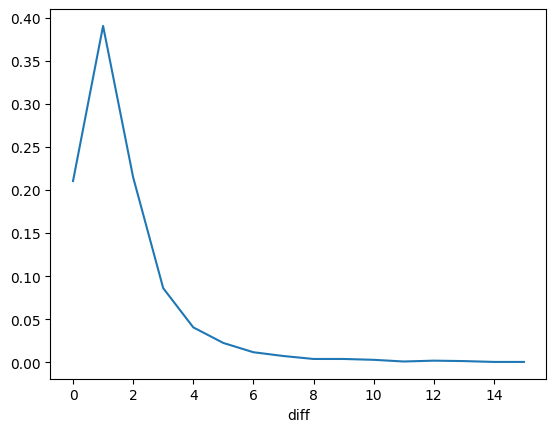

In [258]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

<Axes: xlabel='DATE'>

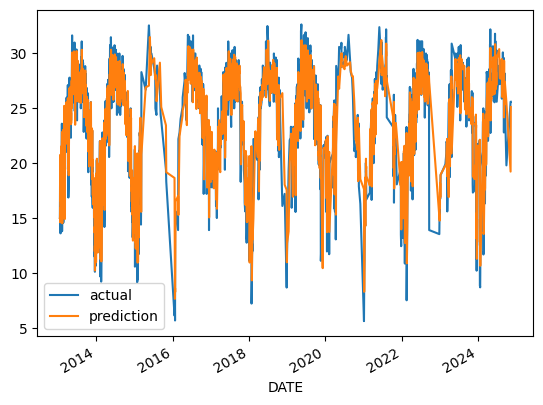

In [259]:
predictions[['actual','prediction']].plot()